# ResNet50 Model Heatmap

<a href="https://colab.research.google.com/drive/1HHdRNI-Zz3oIKLd-itsutUwc1Lz1QaZX#scrollTo=Y3_sl9CiADjD" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>
  
<a href="https://github.com/WinetraubLab/roi-classification-foundation-model/tree/main" target="_blank">
  <img src="https://img.shields.io/badge/view%20in-GitHub-blue" alt="View in GitHub"/>
</a>


## Mount the Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Clone the Repo

In [16]:
!git clone https://github.com/WinetraubLab/roi-classification-foundation-model.git
%cd ./roi-classification-foundation-model/

Cloning into 'roi-classification-foundation-model'...
remote: Enumerating objects: 28361, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 28361 (delta 2), reused 28 (delta 2), pack-reused 28327 (from 1)
Receiving objects: 100% (28361/28361), 181.85 MiB | 15.28 MiB/s, done.
Resolving deltas: 100% (8231/8231), done.
Updating files: 100% (27127/27127), done.
/content/roi-classification-foundation-model/roi-classification-foundation-model


## Installing required libraries

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24

## Importing Necessary Libraries

* The necessary libraries are imported.
* Resnet50Score object is created.


In [18]:
from resnet50_score import Resnet50Score
from PIL import Image
# creating an object
resnet_score = Resnet50Score()

patch_size = 256

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Extracting Features of RCM Test Image Patches

RCM test image is separated into 256x256 patches and the embeddings of each patch are extracted.


Necessary Folder and File Paths:

- RCM test image file path.
- RCM test image patch folder where the patches of the test image will be saved.
- RCM test image feature embedding folder where the embeddings of each patch of the test image will be saved.

In [19]:
# extracting features of test image patches
test_image_path = '/content/drive/Shareddrives/Yolab - Current Projects/Kyi Lei Aye/ResNet50/test_img.jpg' # put test image file path
test_patch_folder = '/content/drive/Shareddrives/Yolab - Current Projects/Kyi Lei Aye/ResNet50/test_rcm_patches' # the folder where the patches will be saved
test_feature_folder = '/content/drive/Shareddrives/Yolab - Current Projects/Kyi Lei Aye/ResNet50/test_rcm_patch_features' # the folder where the feature embeddings of test img patches will be saved
# Extract patches and embeddings from the test image
resnet_score.extract_patches(test_image_path, test_patch_folder, test_feature_folder)
print('RCM Test image was successfully separated into patches')


RCM Test image was successfully separated into patches


## Resizing the RCM Reference Image and Extracting the Embeddings

RCM reference image is resized into 256x256 patch and the embeddings of that patch are extracted.

Necessary Folder and File Paths:
- RCM reference image file path
- RCM reference image patch folder where the patch of the ref image will be saved.
- RCM reference image feature embedding folder where the embeddings of the ref patch folder will be saved.

In [20]:
# extracting features of the reference image patch
ref_image_path = '/content/drive/Shareddrives/Yolab - Current Projects/Kyi Lei Aye/ResNet50/ref_img.png'
# resize 256x256 ref image
with Image.open(ref_image_path) as img:
    resized_ref_image = img.resize((256, 256))
    resized_ref_image.save(ref_image_path) #overwriting the original image file

ref_patch_folder = '/content/drive/Shareddrives/Yolab - Current Projects/Kyi Lei Aye/ResNet50/ref_rcm_patch'
ref_feature_folder = '/content/drive/Shareddrives/Yolab - Current Projects/Kyi Lei Aye/ResNet50/ref_rcm_patch_features'
resnet_score.extract_patches(ref_image_path, ref_patch_folder, ref_feature_folder)
print('RCM Reference image was successfully resized into 256x256 patch and the embeddings were extracted.')


RCM Reference image was successfully resized into 256x256 patch and the embeddings were extracted.


## Calculating Similarity and HeatMap

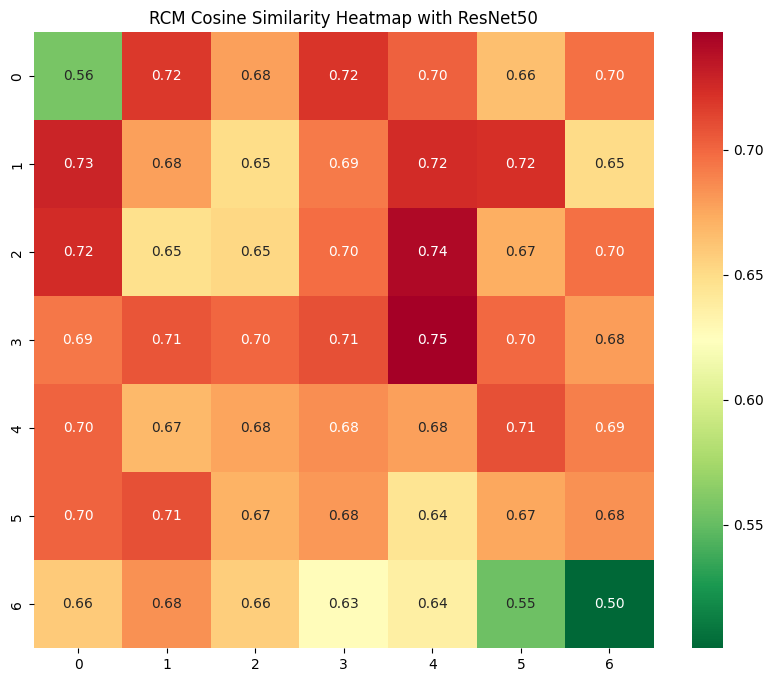

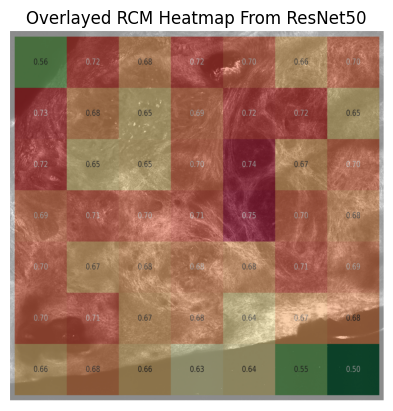

In [23]:
# calculate similarity grid
ref_feature_path = '/content/drive/Shareddrives/Yolab - Current Projects/Kyi Lei Aye/ResNet50/ref_rcm_patch_features/patch_0_0.npy'
similarity_grid = resnet_score.calculate_cosine_sim(ref_feature_path, test_feature_folder)

# plot heatmap
heatmap_file_path = '/content/drive/Shareddrives/Yolab - Current Projects/Kyi Lei Aye/ResNet50/heatmap.png'
overlay_heatmap_file_path = '/content/drive/Shareddrives/Yolab - Current Projects/Kyi Lei Aye/ResNet50/overlayed_heatmap.png'
resnet_score.heatmap(ref_feature_path,test_feature_folder, heatmap_file_path,overlay_heatmap_file_path)
print()
resnet_score.overlay_heatmap(overlay_heatmap_file_path, test_image_path)
